In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the .dat file (adjust delimiter as needed)
movies = pd.read_csv(r'C:\Users\user\Desktop\MICHELLE\Dev\Projects\movie-recommendation\datasets\movies.dat', sep='::', engine='python', encoding='ISO-8859-1') # Example with double colon delimiter


In [3]:
ratings = pd.read_csv(r'C:\Users\user\Desktop\MICHELLE\Dev\Projects\movie-recommendation\datasets\ratings.dat', sep='::', engine='python', encoding='ISO-8859-1')
users = pd.read_csv(r'C:\Users\user\Desktop\MICHELLE\Dev\Projects\movie-recommendation\datasets\users.dat', sep='::', engine='python', encoding='ISO-8859-1') 

In [4]:
movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
ratings.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [6]:
users.head()

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [7]:
# Specify column names for each dataset
user_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movie_columns = ['MovieID', 'Title', 'Genres']
rating_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Load the datasets with specified column names
users = pd.read_csv('datasets/users.dat', sep='::', engine='python', encoding='ISO-8859-1', names=user_columns)
movies = pd.read_csv('datasets/movies.dat', sep='::', engine='python', encoding='ISO-8859-1', names=movie_columns)
ratings = pd.read_csv('datasets/ratings.dat', sep='::', engine='python', encoding='ISO-8859-1', names=rating_columns)


In [8]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


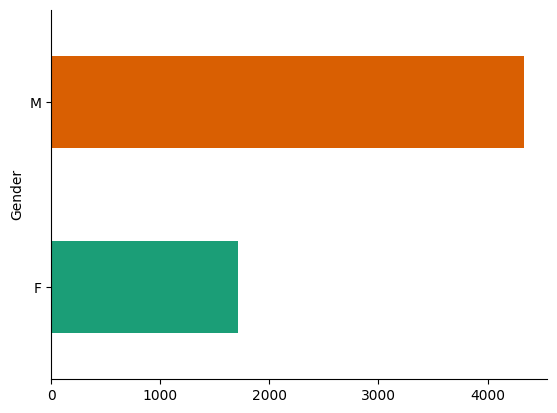

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
users.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<h2> Data PreProcessing </h2>

In [10]:
# Check for null values and handle if any
print("Null values in Users:", users.isnull().sum())
print("Null values in Movies:", movies.isnull().sum())
print("Null values in Ratings:", ratings.isnull().sum())

Null values in Users: UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64
Null values in Movies: MovieID    0
Title      0
Genres     0
dtype: int64
Null values in Ratings: UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [11]:
# Merge datasets
# Step 1: Merge users and ratings on 'UserID'
user_ratings = pd.merge(ratings, users, on='UserID')

In [12]:
# Step 2: Merge the result with movies on 'MovieID'
merged_data = pd.merge(user_ratings, movies, on='MovieID')

In [13]:
# Drop any columns not needed (e.g., Timestamp in ratings)
merged_data = merged_data.drop(columns=['Timestamp'])

In [14]:
# Preview the merged data
print(merged_data.head())

   UserID  MovieID  Rating Gender  Age  Occupation Zip-code  \
0       1     1193       5      F    1          10    48067   
1       1      661       3      F    1          10    48067   
2       1      914       3      F    1          10    48067   
3       1     3408       4      F    1          10    48067   
4       1     2355       5      F    1          10    48067   

                                    Title                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  


In [15]:
# Rename merged_data to df
df = merged_data.copy()

In [16]:
df.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [17]:
df.shape

(1000209, 9)

<h3> Converting Categorical Data to Numerical Form </h3>

In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [19]:
# Convert categorical columns to numerical values using Label Encoding
# Example columns: 'Gender', 'Title', 'Genres' 

# Label encoding Gender as an example
label_encoders = {}  # Dictionary to store label encoders for inverse transform if needed
for col in ['Gender', 'Title', 'Genres']:  # Add more columns as required
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

In [20]:
# Normalize/Scale numerical columns for better performance in recommendation models
# Identify the columns to scale (e.g., 'Age', 'Rating', etc.)
scaler = MinMaxScaler()

In [21]:
# Scaling selected columns
df[['Age', 'Rating']] = scaler.fit_transform(df[['Age', 'Rating']])

In [22]:
# Preview the transformed DataFrame
print(df.head())

   UserID  MovieID  Rating  Gender  Age  Occupation Zip-code  Title  Genres
0       1     1193    1.00       0  0.0          10    48067   2452     239
1       1      661    0.50       0  0.0          10    48067   1739     152
2       1      914    0.50       0  0.0          10    48067   2289     282
3       1     3408    0.75       0  0.0          10    48067   1054     239
4       1     2355    1.00       0  0.0          10    48067    557     145


<h3> Explanation: </h3>
<b> Label Encoding:</b> Categorical columns like Gender, Title, and Genres are converted to numerical values. Each unique category is assigned a unique integer. Using LabelEncoder helps convert these columns while storing the encoders to enable reverse transformations if needed.

<b> Normalization:</b> Selected numerical columns (Age and Rating in this example) are normalized to the range [0, 1] using MinMaxScaler. This can help improve the model's performance by standardizing the feature scales.

This transformed DataFrame is now ready for further processing in the recommendation system.

In [24]:

df.shape

(1000209, 9)

<h3> Interaction Matrix </h3>
In Phase 3, we can create a user-item interaction matrix, which forms the basis of many recommendation algorithms. This matrix represents user preferences for different items (in this case, movies) and can then be used in collaborative filtering.

Here’s how we can proceed with Phase 3:

Phase 3: Create the User-Item Interaction Matrix
Define the matrix: Using the df dataset, create a matrix where rows represent unique users and columns represent unique items (movies). The matrix values will be ratings (or interactions).
Handle missing values: Since not every user will have rated every movie, you may choose to fill missing values with a default value (e.g., 0 for "no interaction").
Matrix format: Using a pivot_table to transform the DataFrame into a user-item matrix format.

In [23]:
# Creating the user-item matrix with users as rows and movies as columns
user_item_matrix = df.pivot_table(index='UserID', columns='MovieID', values='Rating', fill_value=0)

In [24]:
# Converting it to a numpy array for use in collaborative filtering
user_item_matrix_np = user_item_matrix.values


In [25]:
# Preview the matrix
print("User-Item Matrix Shape:", user_item_matrix.shape)
print(user_item_matrix.head())

User-Item Matrix Shape: (6040, 3706)
MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         1.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0  0.25   0.0   0.0   0.0   0.0  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         